#<b> Detect Pneumonia on X-Ray data using Convolutional Neural Network (CNN) </b>

The task of this project is to use a CNN model to predict whether someone has or not PNEUMONIA based on its x-ray image. 


Tha images are already split by TRAIN & TEST, but these are combined and shuffled. The model is trained using 80% of the data, and validated on the remained 20%.

Afterwards, the model is used to predict an unseen image of someone's X-ray.

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

import time
from tensorflow.keras.callbacks import TensorBoard

PNEUMONIA


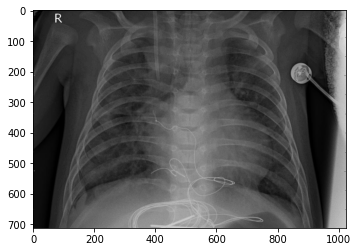

(712, 1024)
NORMAL


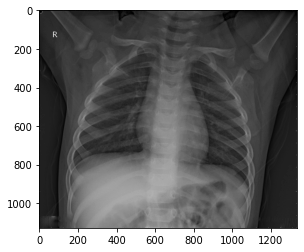

(1128, 1336)


In [ ]:
DATADIR = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'
CATEGORIES = ['PNEUMONIA', 'NORMAL']


for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to pneumonia & normal
    for img in os.listdir(path):
        print(category)
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        print(img_array.shape)
        break
    

As can be observed the sizes of the images differ.

We want to have the same size for all the image in order to train our CNN.

(100, 100)


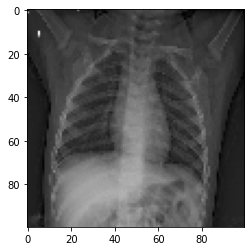

In [ ]:
size = 100

new_img = cv2.resize(img_array, (size, size))
plt.imshow(new_img, cmap='gray')
print(new_img.shape)

Let's apply resizing to all images and create our training data

In [ ]:
train = []

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to pneumonia & normal
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        #print(category)
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        new_img = cv2.resize(img_array, (size, size))
        train.append([new_img, class_num])



In [ ]:
print(len(train))

5216


Let's do the same for the testing data

In [ ]:
DATADIR2 = '/kaggle/input/chest-xray-pneumonia/chest_xray/test'
test = []

for category in CATEGORIES:
    path = os.path.join(DATADIR2, category) # path to pneumonia & normal
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
        #print(category)
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        new_img = cv2.resize(img_array, (size, size))
        test.append([new_img, class_num])

In [ ]:
print(len(test))

624


In [ ]:
# Combine the train and test data
DATA = train + test

In [ ]:
# We have to shuffle the data
import random
random.shuffle(DATA)

In [ ]:
# Turn data into features and target
X = []
y = []

for features, label in DATA:
    #print(features,'\n', label)
    X.append(features)
    y.append(label)

In [ ]:
# Check for imbalances
P = 0 
H = 0
for i in y:
    if i == 0:
        P += 1
    H += 1    
print('Pneumonia: {}; Healthy: {}'.format(P,H))

Pneumonia: 4265; Healthy: 5840


As can be observed, our data is quite balanced.

There are few steps left before we can start the modelling.

In [ ]:
X[0].shape

(100, 100)

As can be seen, the features are currently 2D, we need to turn them into tensors (3D) in order to feed them to the CNN.

In order to do that, we first need to turn the features into arrays.

In [ ]:
X = np.array(X).reshape(-1, size, size, 1) # 1 is used as the number of channels because the images are grayscale
y = np.array(y)

In [ ]:
print(X[0].shape)

(100, 100, 1)


The last step is to normalize the data.

Easiest way is to scale that data: min 0, max 255.

In [ ]:
X = X/255.0

Build the CNN

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (100, 100, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 68, 68, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 68, 68, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
# Set tensorboard directory
import datetime
log_dir = "logs\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

Fit the CNN to the data

In [ ]:
history = model.fit(X, y, batch_size = 32, 
         validation_split = 0.2,
         epochs=5,
         callbacks = [tensorboard_callback])

Epoch 1/5
146/146 [==============================] - 27s 187ms/step - loss: 0.1264 - accuracy: 0.9518 - val_loss: 0.2042 - val_accuracy: 0.9238
Epoch 2/5
146/146 [==============================] - 27s 184ms/step - loss: 0.1357 - accuracy: 0.9512 - val_loss: 0.1566 - val_accuracy: 0.9392
Epoch 3/5
146/146 [==============================] - 26s 181ms/step - loss: 0.1115 - accuracy: 0.9598 - val_loss: 0.1456 - val_accuracy: 0.9495
Epoch 4/5
146/146 [==============================] - 27s 182ms/step - loss: 0.1048 - accuracy: 0.9613 - val_loss: 0.1461 - val_accuracy: 0.9435
Epoch 5/5
146/146 [==============================] - 27s 182ms/step - loss: 0.1018 - accuracy: 0.9604 - val_loss: 0.1622 - val_accuracy: 0.9409


In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs\\

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 101), started 0:00:30 ago. (Use '!kill 101' to kill it.)

Text(0, 0.5, 'loss')

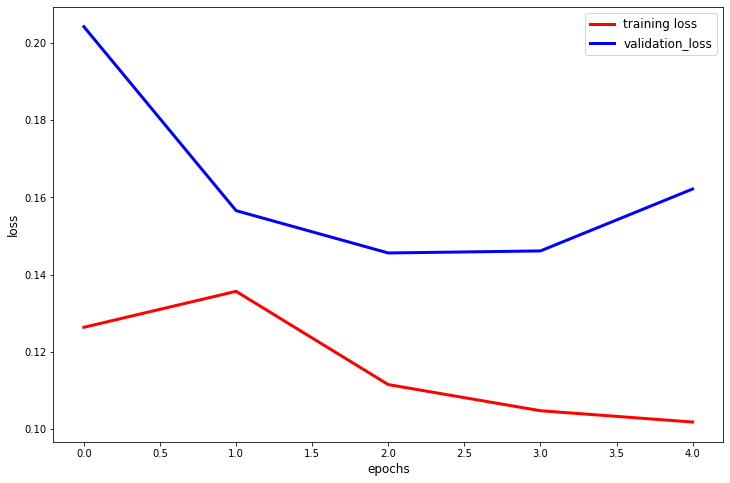

In [ ]:
## example plotting
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'], 'r', linewidth=3)
plt.plot(history.history['val_loss'], 'b', linewidth=3)
plt.legend(['training loss', 'validation_loss'], fontsize=12)
plt.xlabel('epochs', fontsize=12)
plt.ylabel('loss', fontsize=12)

Text(0, 0.5, 'accuracy')

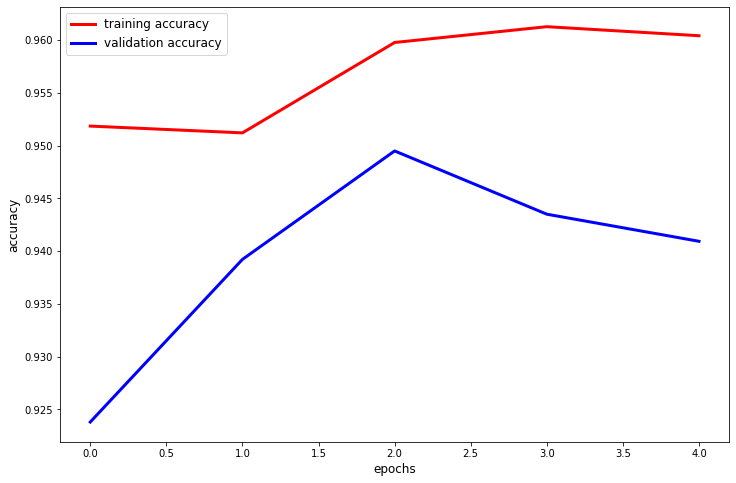

In [ ]:
## example plotting
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'], 'r', linewidth=3)
plt.plot(history.history['val_accuracy'], 'b', linewidth=3)
plt.legend(['training accuracy', 'validation accuracy'], fontsize=12)
plt.xlabel('epochs', fontsize=12)
plt.ylabel('accuracy', fontsize=12)

The model seems to slightly overfitts after 4th epoch.

In [ ]:
# Make prediction on someone's lungs radiogrpahy

def prepare(filepath):
    IMG_SIZE = 100
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (size, size))
    return new_array.reshape(-1, size, size, 1)

In [ ]:
prediction = model.predict([prepare('/kaggle/input/ttaaaa/lungs.jpeg')])
print(CATEGORIES[int(prediction[0][0])]) 

PNEUMONIA
